In [1]:
import pandas as pd
import numpy as np

In [2]:
openpath = "E:/Old Downloads Folder/Research Stuff/Climate Data/Pittsburgh_UHII.csv"

with open(openpath) as f:
    
    data = pd.read_csv(f, sep = ',')

codes = []
    
for index, row in data.iterrows():
    
    code = row['STATION']
    
    codes.append(code)
    
data = data.set_index(['STATION'])

In [3]:
# This code finds the integrals of the first peak from Ovito analyses

s1 = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coordination Analysis Data/'

s2 = '_first_peak.txt'

firstPeakIntegrals = pd.DataFrame()

for code in codes:
    
    openpath = s1 + code + s2
    
    with open(openpath) as f:
    
        val = f.read()

        temp_df = pd.DataFrame([[code, float(val)]], columns = ['Station', 'First Peak Integral'])
        
        firstPeakIntegrals = firstPeakIntegrals.append(temp_df, ignore_index = True)
        
firstPeakIntegrals = firstPeakIntegrals.set_index(['Station'])

In [4]:
# This code finds the data found from QGIS and the average albedo of every area

s1 = 'E:/Old Downloads Folder/Research Stuff/GIS Maps/Albedo Data/'

s2 = '_weighted_albedo.txt'

albedos = pd.DataFrame()

for code in codes:
    
    openpath = s1 + code + s2
    
    with open(openpath) as f:
    
        val = f.read()

        temp_df = pd.DataFrame([[code, float(val)]], columns = ['Station', 'Weighted Albedo'])
        
        albedos = albedos.append(temp_df, ignore_index = True)
        
albedos = albedos.set_index(['Station'])

In [5]:
# This code finds the clustering data from OVITO and finds the location of the first drop

s1 = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coords Folder/Weather Station Coords/First Drops/'

s2 = '_first_drop.txt'

drops = pd.DataFrame()

for code in codes:
    
    openpath = s1 + code + s2
    
    with open(openpath) as f:
    
        val = f.read()

        temp_df = pd.DataFrame([[code, float(val)]], columns = ['Station', 'First Drop'])
        
        drops = drops.append(temp_df, ignore_index = True)
        
drops = drops.set_index(['Station'])

In [6]:
# This code finds the buildings per cluster at the location of the first drop

s1 = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coords Folder/Weather Station Coords/First Drops/Buildings per Cluster/'

s2 = '_buildings_per_cluster.txt'

perCluster = pd.DataFrame()

for code in codes:
    
    openpath = s1 + code + s2
    
    with open(openpath) as f:
    
        val = f.read()

        temp_df = pd.DataFrame([[code, float(val)]], columns = ['Station', 'Buildings Per Cluster'])
        
        perCluster = perCluster.append(temp_df, ignore_index = True)
        
perCluster = perCluster.set_index(['Station'])

In [7]:
# This code finds the data found from QGIS and the average albedo of every area

s1 = 'E:/Old Downloads Folder/Research Stuff/GIS Maps/Albedo Data/'

s2 = '_area_albedo.txt'

areaAlbedos = pd.DataFrame()

for code in codes:
    
    openpath = s1 + code + s2
    
    with open(openpath) as f:
    
        val = f.read()

        temp_df = pd.DataFrame([[code, float(val)]], columns = ['Station', 'Area Albedo'])
        
        areaAlbedos = areaAlbedos.append(temp_df, ignore_index = True)
        
areaAlbedos = areaAlbedos.set_index(['Station'])

In [8]:
# This code finds the data found from QGIS and the average albedo of every area

s1 = 'E:/Old Downloads Folder/Research Stuff/GIS Maps/Albedo Data/'

s2 = '_area_no_river_albedo.txt'

noRiver = pd.DataFrame()

for code in codes:
    
    openpath = s1 + code + s2
    
    with open(openpath) as f:
    
        val = f.read()

        temp_df = pd.DataFrame([[code, float(val)]], columns = ['Station', 'No River Albedo'])
        
        noRiver = noRiver.append(temp_df, ignore_index = True)
        
noRiver = noRiver.set_index(['Station'])

In [9]:
# Find the total number of buildings in every station area

import os, os.path

s1 = 'E:/Old Downloads Folder/Research Stuff/GIS Maps/Rooftops/'

buildingsPerStation = pd.DataFrame()

for code in codes:
    
    folder = s1 + code
    
    val = len([name for name in os.listdir(folder) if os.path.isfile(os.path.join(folder, name))])
    
    temp_df = pd.DataFrame([[code, int(val)]], columns = ['Station', 'Buildings In Area'])
        
    buildingsPerStation = buildingsPerStation.append(temp_df, ignore_index = True)

buildingsPerStation = buildingsPerStation.set_index(['Station'])    

In [10]:
# Import the distance to the nearest river

s1 = 'E:/Old Downloads Folder/Research Stuff/Climate Data/Pittsburgh_Dist2River.csv'

distToRiver = pd.read_csv(s1, sep = ',')

distToRiver = distToRiver.set_index(['Station'])

distToRiver.columns = ['Distance to River']

distToRiver['Distance to River'] *= 364000

In [11]:
# This code finds the Hexatic order paramter average values

s1 = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Hexatic Order Parameters/'

s2 = '_hexatic_order_parameter.txt'

hexatic = pd.DataFrame()

for code in codes:
    
    openpath = s1 + code + s2
    
    with open(openpath) as f:
    
        val = f.read()

        temp_df = pd.DataFrame([[code, float(val)]], columns = ['Station', 'Hex Order Average'])
        
        hexatic = hexatic.append(temp_df, ignore_index = True)
        
hexatic = hexatic.set_index(['Station'])

In [12]:
# Now we need to merge these frames together

final_frame = pd.DataFrame()

final_frame = pd.concat([data, firstPeakIntegrals, albedos, drops, perCluster, areaAlbedos, buildingsPerStation, distToRiver, noRiver, hexatic], axis = 1, sort = False)

final_frame

,UHI,First Peak Integral,Weighted Albedo,First Drop,Buildings Per Cluster,Area Albedo,Buildings In Area,Distance to River,No River Albedo,Hex Order Average
USC00360022,2.411053,2.742999,0.540877,261.630,26.704846,0.43409,24248,0.000000,0.43505,0.425125
USC00360861,5.129269,1.585922,0.535985,421.805,381.944444,0.45598,68750,0.000000,0.47509,0.458757
USC00362574,3.167400,1.396532,0.540247,122.514,6.342829,0.44289,38076,0.000000,0.44515,0.442949
USC00365573,1.490365,1.069074,0.549448,159.995,17.492454,0.44746,44046,95.833459,0.45892,0.438127
USC00365918,2.149054,3.846643,0.538640,137.334,4.805890,0.43075,17950,7298.700428,0.44371,0.413714
USW00014762,4.535355,2.152906,0.554050,189.215,25.700230,0.45780,44667,11628.183504,0.46430,0.458904
USW00094823,3.455903,2.562728,0.554652,137.287,4.454569,0.43474,16865,19448.415406,0.45602,0.424168


In [13]:
# Now to do the regression analysis

from sklearn.linear_model import LinearRegression

# # Create linear regression object

mlr = LinearRegression()

# # Fit linear regression

# mlr.fit(final_frame[['First Peak Integral', 'Weighted Albedo', 'First Drop', 'Buildings Per Cluster', 'Area Albedo', 'Buildings In Area', 'Distance to River']], final_frame['UHI'])

# # Get the slope and intercept of the line best fit

# print(mlr.intercept_)

# print(mlr.coef_)

In [14]:
from sklearn.metrics import r2_score

# y_true = final_frame['UHI'].tolist()

# y_pred = []

# for index, data in final_frame.iterrows():
    
#     pred = mlr.intercept_ + data['First Peak Integral'] * mlr.coef_[0] + data['Weighted Albedo'] * mlr.coef_[1] + data['First Drop'] * mlr.coef_[2] + data['Buildings Per Cluster'] * mlr.coef_[3] + data['Area Albedo'] * mlr.coef_[4] + data['Buildings In Area'] * mlr.coef_[5] + data['Distance to River'] * mlr.coef_[6]
    
#     y_pred.append(pred)

# print('The R2 value using all the predictor variables is: ' + str(r2_score(y_true, y_pred)))

In [15]:
# plot_frame = final_frame.copy()

# plot_frame['Predicted UHI'] = y_pred

# plot_frame['UHI Diff'] = plot_frame['Predicted UHI'] - plot_frame['UHI']

# plot_frame

In [16]:
# This bit of code is my attempt to find the most important predictor variables

# predict_frame = final_frame.copy().drop(['UHI'], axis = 1)

# numCols = len(predict_frame.columns)

# y_true = final_frame['UHI'].tolist()

# for i in range(numCols):
    
#     predictorCols = np.arange(1, numCols + 1)

#     predictorCols = np.delete(predictorCols, i)
    
#     colNames = []
    
#     for col in predictorCols:
        
#         colNames.append(predict_frame.columns[col - 1])
        
#     mlr.fit(final_frame[colNames], final_frame['UHI'])
    
#     y_pred = []
    
#     for index, data in final_frame.iterrows():
    
#         pred = mlr.intercept_
        
#         for item in colNames:
            
#             pred += data[item] * mlr.coef_[colNames.index(item)]
    
#         y_pred.append(pred)
    
#     print('The R2 value is: ' + str(round(r2_score(y_true, y_pred), 2)), '--', \
#           'The dropped variable is: ' + str(predict_frame.columns[i]))

In [23]:
# This one goes through and outputs the R^2 of all combos of input variables

total_frame = pd.DataFrame()

from itertools import combinations

predict_frame = final_frame.copy()

predict_frame = predict_frame.drop(['USC00365573'])

y_true = predict_frame['UHI'].tolist()

predict_frame = predict_frame.drop(['UHI'], axis = 1)

cols = predict_frame.columns

variables = 3

varDict = {}

for i in range(1, variables + 1):
    
    combos = list(combinations(cols, i))
    
    for j in range(len(combos)):
        
        colNames = list(combos[j])
        
        mlr.fit(predict_frame[colNames], y_true)
    
        y_pred = []
    
        for index, data in predict_frame.iterrows():

            pred = mlr.intercept_
            
            for item in colNames:
                
                pred += data[item] * mlr.coef_[colNames.index(item)]

            y_pred.append(pred)
        
        r2 = round(r2_score(y_true, y_pred), 3)
        
        temp_frame = pd.DataFrame()
        
        if r2 >= 0.8:
            
            temp_frame['R2'] = [r2]

            for k in range(0, variables):

                try:

                    var = colNames[k]

                except:

                    var = 'N/A'
                
                if var in varDict:
                        
                    varDict[var] += 1
                        
                else:
                        
                    varDict[var] = 1
                
                temp_frame['Variable #' + str(k + 1)] = [var]

            total_frame = total_frame.append(temp_frame)    

total_frame.to_csv('Variable_Combos.csv', index = False)

In [24]:
varDict.pop('N/A')

varDict

{'Area Albedo': 37,
 'No River Albedo': 37,
 'Hex Order Average': 37,
 'First Peak Integral': 26,
 'Weighted Albedo': 30,
 'Buildings Per Cluster': 28,
 'Buildings In Area': 30,
 'First Drop': 25,
 'Distance to River': 29}

[Text(0, 0.5, 'Actual UHI')]

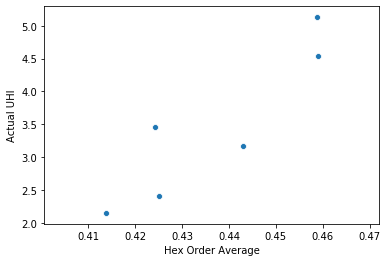

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.scatterplot(y = y_true, x = predict_frame['Hex Order Average'])
ax.set(ylabel = 'Actual UHI')

In [94]:
copy_frame = final_frame.copy()

copy_frame = copy_frame.drop(['First Drop', 'First Peak Integral', 'Area Albedo', 'Buildings Per Cluster'], axis = 1)

copy_frame = copy_frame.drop(['USC00365573'])

copy_frame

,UHI,Weighted Albedo,Buildings In Area,Distance to River
USC00360022,2.411053,0.540877,24248,0.000000
USC00360861,5.129269,0.535985,68750,0.000000
USC00362574,3.167400,0.540247,38076,0.000000
USC00365918,2.149054,0.538640,17950,7298.700428
USW00014762,4.535355,0.554050,44667,11628.183504
USW00094823,3.455903,0.554652,16865,19448.415406


In [95]:
mlr.fit(copy_frame[['Weighted Albedo', 'Buildings In Area', 'Distance to River']], copy_frame['UHI'])

y_true = copy_frame['UHI']

y_predict = []

for index, data in copy_frame.iterrows():
    
    pred = mlr.intercept_ + data['Weighted Albedo'] * mlr.coef_[0] + data['Buildings In Area'] * mlr.coef_[1] + data['Distance to River'] * mlr.coef_[2]
    
    y_predict.append(pred)
    
copy_frame['Predictions'] = y_predict

print('The R2 value using the predictor variables is: ' + str(round(r2_score(y_true, y_predict), 2)))

print(mlr.intercept_, mlr.coef_)

copy_frame

The R2 value using the predictor variables is: 0.99
-13.734297618471809 [2.67936920e+01 6.44904829e-05 5.75445308e-05]


,UHI,Weighted Albedo,Buildings In Area,Distance to River,Predictions
USC00360022,2.411053,0.540877,24248,0.000000,2.321550
USC00360861,5.129269,0.535985,68750,0.000000,5.060438
USC00362574,3.167400,0.540247,38076,0.000000,3.196448
USC00365918,2.149054,0.538640,17950,7298.700428,2.275466
USW00014762,4.535355,0.554050,44667,11628.183504,4.660483
USW00094823,3.455903,0.554652,16865,19448.415406,3.333648


[Text(0, 0.5, 'Predicted UHI'), Text(0.5, 0, 'Actual UHI')]

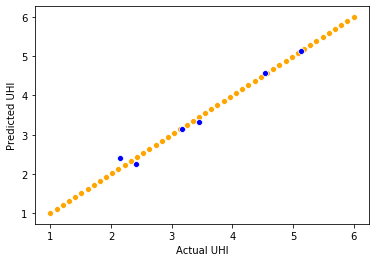

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

xline = np.linspace(1, 6)
yline = np.linspace(1, 6)

ax = sns.scatterplot(x = xline, y = yline, color = 'orange')
sns.scatterplot(x = y_true, y = y_predict, color = 'blue')
ax.set(ylabel = 'Predicted UHI', xlabel = 'Actual UHI')